In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC as svm
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier as kn
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
ds = pd.read_csv("/content/drive/MyDrive/datasets/Project 2/Iris.csv")

In [4]:
ds.head(7)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa


In [5]:
ds.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
ds.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [7]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
ds["Species"].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [9]:
ds = ds.drop(columns = ['Id'])

In [10]:
ds.head(7)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa


In [11]:
y = ds['Species']
x = ds.drop(columns='Species')

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)

In [12]:
y.head(7)

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
5,Iris-setosa
6,Iris-setosa


In [13]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [14]:
for i in range(3,15,3):
  neigh = kn(n_neighbors=i)
  neigh.fit(x_train, y_train)
  pred = neigh.predict(x_test)
  accuracy = accuracy_score(pred, y_test)
  print("kneighbors {}".format(i))
  print(accuracy)
  print(classification_report(pred, y_test, labels=None, digits=4))
  print("")

kneighbors 3
0.9777777777777777
                 precision    recall  f1-score   support

    Iris-setosa     1.0000    1.0000    1.0000        16
Iris-versicolor     0.9444    1.0000    0.9714        17
 Iris-virginica     1.0000    0.9167    0.9565        12

       accuracy                         0.9778        45
      macro avg     0.9815    0.9722    0.9760        45
   weighted avg     0.9790    0.9778    0.9776        45


kneighbors 6
0.9777777777777777
                 precision    recall  f1-score   support

    Iris-setosa     1.0000    1.0000    1.0000        16
Iris-versicolor     0.9444    1.0000    0.9714        17
 Iris-virginica     1.0000    0.9167    0.9565        12

       accuracy                         0.9778        45
      macro avg     0.9815    0.9722    0.9760        45
   weighted avg     0.9790    0.9778    0.9776        45


kneighbors 9
0.9777777777777777
                 precision    recall  f1-score   support

    Iris-setosa     1.0000    1.0000    

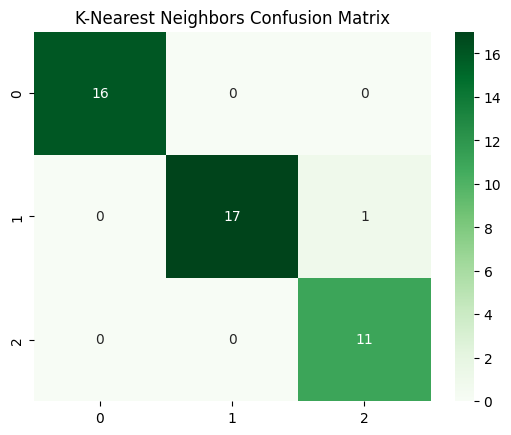

In [15]:
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='d', cmap='Greens')
plt.title("K-Nearest Neighbors Confusion Matrix")
plt.show()

In [39]:
model = RF(n_estimators=70, random_state=0)
model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=70, random_state=0)

In [40]:
pred=model.predict(x_test)
cm=confusion_matrix(y_test, pred)
accuracy = accuracy_score(y_test,pred)
print(model)
print(accuracy)
print(classification_report(y_test,pred, labels=None, digits=4))

RandomForestClassifier(n_estimators=70, random_state=0)
0.9777777777777777
                 precision    recall  f1-score   support

    Iris-setosa     1.0000    1.0000    1.0000        16
Iris-versicolor     1.0000    0.9444    0.9714        18
 Iris-virginica     0.9167    1.0000    0.9565        11

       accuracy                         0.9778        45
      macro avg     0.9722    0.9815    0.9760        45
   weighted avg     0.9796    0.9778    0.9779        45



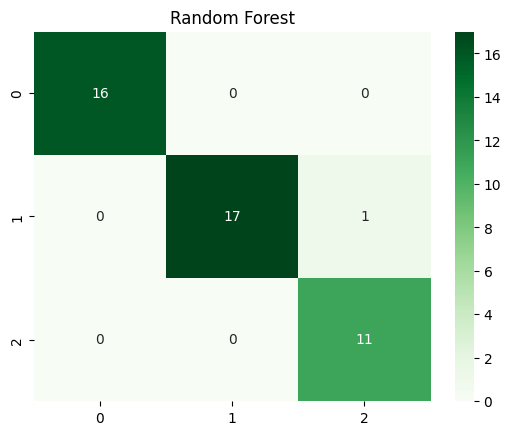

In [41]:
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='d', cmap='Greens')
plt.title("Random Forest")
plt.show()

In [42]:
xgb_clf = XGBClassifier()

In [43]:
xgb_clf=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
colsample_bynode=1, colsample_bytree=1, gamma=0,
learning_rate=0.1, max_delta_step=0, max_depth=10,
min_child_weight=1, missing=1, n_estimators=150, n_jobs=1,
nthread=None, objective='binary:logistic', random_state=0,
reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
silent=None, subsample=1, verbosity=1)

In [54]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Fit the encoder to your training data and transform it
y_train = le.fit_transform(y_train)

# Now you can fit the XGBoost model
xgb_clf.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:18:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=0, max_depth=10,
              max_leaves=None, min_child_weight=1, missing=1,
              monotone_constraints=None, multi_strategy=None, n_estimators=150,
              n_jobs=1, nthread=None, num_parallel_tree=None, ...)

In [56]:
y_test = le.transform(y_test)
pred = xgb_clf.predict(x_test)

In [58]:
accuracy = accuracy_score(y_test,pred)
print(classification_report(y_test,pred, labels=None, digits=4))

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        16
           1     1.0000    0.9444    0.9714        18
           2     0.9167    1.0000    0.9565        11

    accuracy                         0.9778        45
   macro avg     0.9722    0.9815    0.9760        45
weighted avg     0.9796    0.9778    0.9779        45



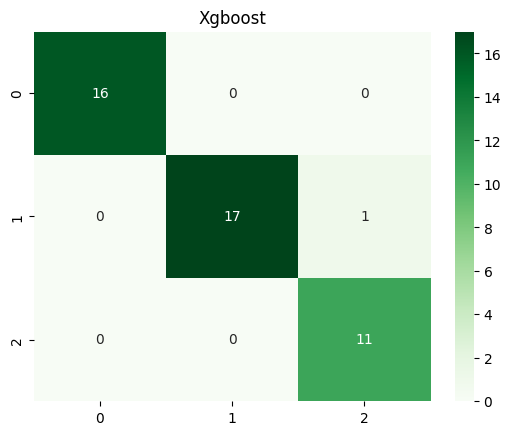

In [59]:
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='d', cmap='Greens')
plt.title("Xgboost")
plt.show()